In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%matplotlib inline

In [27]:
def show(frame):
    plt.imshow(frame.T, cmap='plasma')
    plt.colorbar()
    plt.show()

In [28]:
def set_boundary_zero(inp):
    inp[0, :] = inp[-1, :] = inp[:, 0] = inp[:, -1] = 0
    return inp

In [29]:
dx = dy = 0.02
W, H, T = 1, 1, 500
u = np.zeros([T, int(W / dx), int(H / dy)])

In [30]:
k = 2
# largest possible time step that ensures numerical stability
dt = (dx ** 2 * dy ** 2) / (2 * k * (dx ** 2 + dy ** 2))

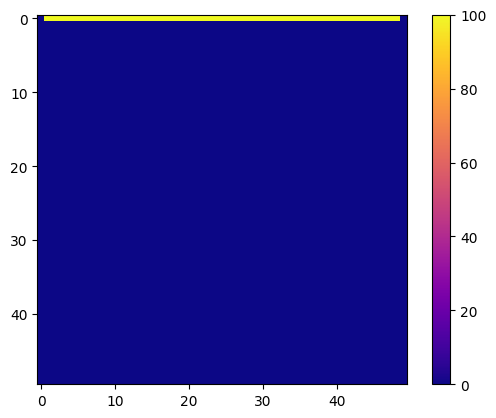

In [31]:
# initial configuration (checker pattern 2x2)
# u[0, :W//2, :H//2] = 100
# u[0, W//2:, H//2:] = 100

# First internet example (100C rod at the top boundary)
u[0,1:-1,0] = 100

# Second internet example (random noise)
# u[0, :, :] = np.random.uniform(low=28.5, high=55.5, size=(W, H))
# u[0] = set_boundary_zero(u[0])

show(u[0])

In [32]:
# Kernel used to calculate finite differences
kernel = np.array([
    [0, 1 / (dy**2), 0],
    [1 / (dx**2), -2 * ( 1 / (dx**2) + 1 / (dy**2) ), 1 / (dx**2)],
    [0, 1 / (dy**2), 0]
])

In [33]:
def update(u):
    laplacian = convolve2d(u, kernel, mode='same', fillvalue=0)
    laplacian = set_boundary_zero(laplacian)
    return u + k * dt * laplacian

In [34]:
for t in range(T - 1):
    u[t + 1] = update(u[t])

MovieWriter ffmpeg unavailable; using Pillow instead.


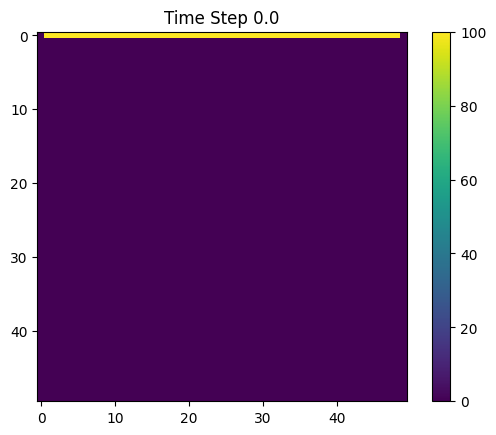

In [35]:
def update(frame):
    plt.clf()
    plt.imshow(u[frame].T, cmap='viridis')
    plt.title(f'Time Step {dt * frame}')
    plt.colorbar()

animation = FuncAnimation(plt.gcf(), update, frames=T, interval=20)

animation.save('animation-1.gif')